<a href="https://colab.research.google.com/github/hollyagustine75/Data-Analytics-Course-Group-Work/blob/main/Breast_Cancer_Wisconsin_(Original)_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)



{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [ ]:
# Masukkin ke dalam Dataframe
# X_data = Data breast cancer
# Y_data = Class data
X_data = pd.DataFrame(X)
Y_data = pd.DataFrame(y)

In [ ]:
# Gabungkan data untuk melakukan preprocessing
CombinedData = pd.concat([X_data, Y_data], axis=1)

In [ ]:
CombinedData

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [ ]:
# Cek apakah ada data yang NULL
CombinedData.isna().sum()

,0
Clump_thickness,0
Uniformity_of_cell_size,0
Uniformity_of_cell_shape,0
Marginal_adhesion,0
Single_epithelial_cell_size,0
Bare_nuclei,16
Bland_chromatin,0
Normal_nucleoli,0
Mitoses,0
Class,0


In [ ]:
# Hapus data null (jika ada)
CombinedData.dropna(inplace=True)

In [ ]:
# ReIndexing data agar rapi
CombinedData = CombinedData.reset_index(drop=True)

In [ ]:
CombinedData

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2.0,1,1,1,2
679,2,1,1,1,2,1.0,1,1,1,2
680,5,10,10,3,7,3.0,8,10,2,4
681,4,8,6,4,3,4.0,10,6,1,4


In [ ]:
# Pindahkan data class ke Y_data
Y_data = CombinedData["Class"]

In [ ]:
# Hapus kolom class
CombinedData = CombinedData.drop(columns = ['Class'])

In [ ]:
# Pindahkan data breast canser ke X_data
X_data = CombinedData

In [ ]:
X_data

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2.0,1,1,1
679,2,1,1,1,2,1.0,1,1,1
680,5,10,10,3,7,3.0,8,10,2
681,4,8,6,4,3,4.0,10,6,1


In [ ]:
X_data.describe().style.set_properties(**{'background-color': '#4A235A', 'color': '#E2EEF3'})

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

In [ ]:
# Split data jadi training data dan testing data
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.4, random_state = 134)

In [ ]:
x_test

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
67,1,1,1,1,2,1.0,3,2,1
40,6,10,10,2,8,10.0,7,3,3
21,10,5,5,3,6,7.0,7,10,1
58,5,3,5,5,3,3.0,4,10,1
425,10,4,3,10,4,10.0,10,1,1
...,...,...,...,...,...,...,...,...,...
394,2,3,2,2,2,2.0,3,1,1
291,1,1,1,1,2,1.0,3,1,1
586,1,1,1,1,1,1.0,2,1,1
379,1,1,1,1,1,1.0,1,1,1


In [ ]:
y_test

,Class
67,2
40,4
21,4
58,4
425,4
...,...
394,2
291,2
586,2
379,2


In [ ]:
# Cari K yang optimal

neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    prediction_ = knn.predict(x_test)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 0.9817518248175182 with K = 3


In [ ]:
# Classification

knn = KNeighborsClassifier(n_neighbors=1+test_accuracy.index(np.max(test_accuracy)))
knn.fit(x_train,y_train)
predicted = knn.predict(x_test)
score = knn.score(x_test, y_test)
knn_score_ = np.mean(score)

print('Accuracy : %.3f' % (knn_score_))

Accuracy : 0.982


In [ ]:
# Hasil Classification

p=precision_score(y_test, predicted, pos_label=2)
print('Precision : %.3f' % (p))

r=recall_score(y_test, predicted, pos_label=2)
print('Recall : %.3f' % (r))

f1=f1_score(y_test, predicted, pos_label=2)
print('F1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted', pos_label=2)
print('Weighted f1-score: %.3f' % (f1_w))

Precision : 0.984
Recall : 0.989
F1-score: 0.986
Weighted f1-score: 0.982


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


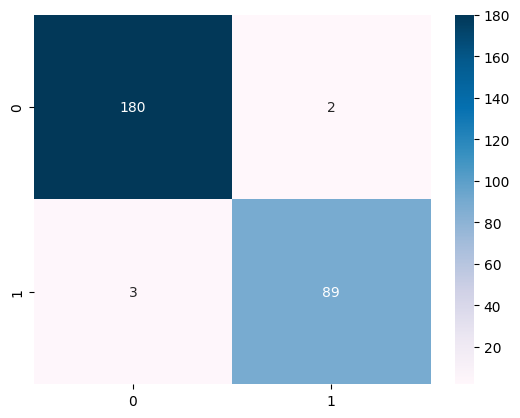

In [ ]:
# Confusion Matrix

cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, cmap="PuBu", annot=True, fmt='.0f')
plt.show()